In [1]:
import pandas as pd
import numpy as np

In [2]:
base_path = "../nanodiag_datasets/GSE175758/"

In [3]:
df_merged_signals = pd.read_csv(base_path + "merged_signals.csv", sep="\t")
df_merged_signals

,cg00035864_TTTY18,cg00050873_TSPY4,cg00050873_FAM197Y2,cg00061679_DAZ1,cg00061679_DAZ4,cg00063477_EIF1AY,cg00121626_BCORL2,cg00212031_TTTY14,cg00214611_TMSB4Y,cg00214611_TMSB4Y.1,...,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10,treatment_label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.103637,0.040383,0.023666,0.099939,0.139099,0.024772,0.033721,0.050619,0.156485,0
1,0.270480,0.902194,0.902194,0.569973,0.569973,0.894919,0.853980,0.042840,0.058059,0.058059,...,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508,1
3,0.101402,0.838766,0.838766,0.518102,0.518102,0.879985,0.244790,0.037552,0.039246,0.039246,...,0.154725,0.091785,0.049722,0.159825,0.107306,0.060053,0.075126,0.070458,0.153665,1
4,0.354877,0.857989,0.857989,0.755372,0.755372,0.887753,0.070243,0.040726,0.028101,0.028101,...,0.137698,0.143775,0.065447,0.130558,0.184181,0.079270,0.060212,0.051502,0.111945,0
5,0.253903,0.874939,0.874939,0.618917,0.618917,0.550921,0.514690,0.221368,0.333022,0.333022,...,0.174652,0.130628,0.048796,0.193901,0.193149,0.052819,0.073456,0.059917,0.237092,1
6,0.076049,0.869502,0.869502,0.673679,0.673679,0.878565,0.751317,0.019023,0.024766,0.024766,...,0.139528,0.051448,0.024416,0.106187,0.096443,0.028928,0.037033,0.034346,0.078823,1
7,0.096294,0.930536,0.930536,0.822343,0.822343,0.894928,0.860561,0.034143,0.038873,0.038873,...,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391,0
9,0.000000,0.662734,0.662734,0.000000,0.000000,0.000000,0.297521,0.000000,0.606316,0.606316,...,0.148856,0.105178,0.036514,0.145285,0.151303,0.054057,0.076587,0.067460,0.187142,1


In [4]:
#df_merged_signals_features = df_merged_signals[df_merged_signals.columns[1:]]
#df_merged_signals_features

In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
labels = df_merged_signals["treatment_label"]
features = df_merged_signals.drop(columns=["treatment_label"])

n_out_features = 100

reduced_features = SelectKBest(f_classif, k=n_out_features).fit_transform(features, labels)

In [8]:
reduced_features.shape

(50, 100)

/scratch/users/anup/miniconda3/envs/nanosampler/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-07 11:59:47.003317: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 11:59:47.074160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 11:59:47.074230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 11:59:47.079871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register fa

<Axes: >

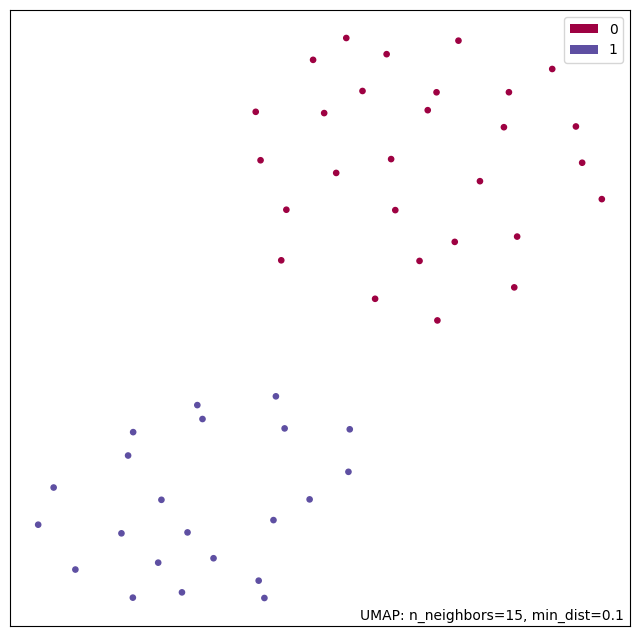

In [9]:
import umap
import umap.plot

# n_neighbors
# min_dist
# n_components
# metric

mapper = umap.UMAP().fit(reduced_features) #n_neighbors=7
umap.plot.points(mapper, labels=labels)

In [10]:
model_selectkfeatures = SelectKBest(f_classif, k=n_out_features).fit(features, labels)
#dir(model_selectkfeatures)

In [11]:
model_selectkfeatures.get_feature_names_out()

array(['cg04730443_MAGEB6', 'cg26965953_IRS4', 'cg00086243_TNFRSF18',
       'cg00746981_HDGF', 'cg00746981_HDGF.1', 'cg03136646_MMP23A',
       'cg03136646_MMP23B', 'cg03970567_ATF3', 'cg08700651_IL28RA',
       'cg11816923_PTPN14', 'cg17220055_HIVEP3', 'cg25593625_MYOM3',
       'cg26661034_PAX7', 'cg26824678_CAPZB', 'cg02893453_SIX2',
       'cg05853130_THSD7B', 'cg19927457_FSHR', 'cg20215622_ERBB4',
       'cg24441922_ARL4C', 'cg24441922_ARL4C.1', 'cg01102073_GATA2',
       'cg05258757_ROPN1B', 'cg06796779_GATA2', 'cg09852607_GATA2',
       'cg11198596_LRIG1', 'cg11431957_VILL', 'cg12223004_CACNA2D3',
       'cg12462883_SLC9A10', 'cg19544746_ACOX3', 'cg27348423_C4orf19',
       'cg03504078_PCDHB3', 'cg18071348_LOC285692', 'cg01758512_FUT9',
       'cg01758512_FUT9.1', 'cg02764478_SIM1', 'cg16507569_COL11A2',
       'cg22788223_NFYA', 'cg22788223_C6orf130', 'cg24351167_PHACTR1',
       'cg00399951_NXPH1', 'cg02286663_TFR2', 'cg09263325_LOC389458',
       'cg10276834_CHRM2', 'cg18071

In [12]:
#model_selectkfeatures.feature_names_in_, len(model_selectkfeatures.feature_names_in_)

In [51]:
from sklearn.model_selection import train_test_split

n_out_features = 100
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25, 461274), (25, 461274), (25,), (25,))

In [52]:
'''from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print(features.shape)
lsvc = LinearSVC(C=1.0, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc, prefit=True)
reduced_features = model.fit_transform(features)
reduced_features.shape'''

'from sklearn.svm import LinearSVC\nfrom sklearn.feature_selection import SelectFromModel\nprint(features.shape)\nlsvc = LinearSVC(C=1.0, penalty="l1", dual=False).fit(features, labels)\nmodel = SelectFromModel(lsvc, prefit=True)\nreduced_features = model.fit_transform(features)\nreduced_features.shape'

In [53]:
#mapper = umap.UMAP(n_neighbors=15).fit(reduced_features) #n_neighbors=7
#umap.plot.points(mapper, labels=y_test)

In [54]:
model_selectkfeatures_train = SelectKBest(f_classif, k=n_out_features).fit(X_train, y_train)
model_selectkfeatures_train.get_feature_names_out()

array(['cg26965953_IRS4', 'cg00746981_HDGF', 'cg00746981_HDGF.1',
       'cg01485998_VASH2', 'cg01485998_VASH2.1', 'cg03136646_MMP23A',
       'cg03136646_MMP23B', 'cg25593625_MYOM3', 'cg02893453_SIX2',
       'cg03181376_ZFP36L2', 'cg03181376_LOC100129726',
       'cg17924218_SCN9A', 'cg17924218_SCN9A.1', 'cg20195812_STAT4',
       'cg20195812_STAT4.1', 'cg24441922_ARL4C', 'cg24441922_ARL4C.1',
       'cg22471230_MME', 'cg22471230_MME.1', 'cg22471230_MME.2',
       'cg22471230_MME.3', 'cg13028471_SLC7A11', 'cg20111875_LOC641518',
       'cg04552346_TCF7', 'cg04552346_TCF7.1', 'cg12517452_ITGA1',
       'cg12517452_PELO', 'cg12517452_PELO.1', 'cg16585682_SCGB3A1',
       'cg25668236_ST8SIA4', 'cg11963660_RNF39', 'cg15119316_RAB23',
       'cg15119316_RAB23.1', 'cg16499284_LOC222699', 'cg16507569_COL11A2',
       'cg18188377_PRR3', 'cg18188377_GNL1', 'cg18188377_GNL1.1',
       'cg22788223_NFYA', 'cg22788223_C6orf130', 'cg23505644_CDSN',
       'cg23505644_PSORS1C1', 'cg23524294_HIST1H2

In [55]:
test_transformed_features = model_selectkfeatures_train.transform(X_test)
test_transformed_features.shape

(25, 100)

In [56]:
scores = -np.log10(model_selectkfeatures_train.pvalues_)
scores /= scores.max()
scores, len(scores)

(array([0.10274515, 0.05610367, 0.05610367, ..., 0.1828561 , 0.04830012,
        0.17035089]),
 461274)

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

clf = make_pipeline(MinMaxScaler(), LinearSVC(dual="auto"))
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

Classification accuracy without selecting features: 0.800


In [58]:
clf_selected = make_pipeline(
    SelectKBest(f_classif, k=n_out_features), MinMaxScaler(), LinearSVC(dual="auto")
)
clf_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

Classification accuracy after univariate feature selection: 0.920


In [59]:
y_pred = clf_selected.predict(X_test)
y_pred.shape

(25,)

In [60]:
dir(clf_selected)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_can_fit_transform',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_parameter_constraints',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_m

In [61]:
best_features = clf_selected[:-1].get_feature_names_out()
#len(clf_selected[:-1].get_feature_names_out())

In [62]:
best_gene_features = ",".join([item.split("_")[1] for item in best_features])
best_gene_features

'IRS4,HDGF,HDGF.1,VASH2,VASH2.1,MMP23A,MMP23B,MYOM3,SIX2,ZFP36L2,LOC100129726,SCN9A,SCN9A.1,STAT4,STAT4.1,ARL4C,ARL4C.1,MME,MME.1,MME.2,MME.3,SLC7A11,LOC641518,TCF7,TCF7.1,ITGA1,PELO,PELO.1,SCGB3A1,ST8SIA4,RNF39,RAB23,RAB23.1,LOC222699,COL11A2,PRR3,GNL1,GNL1.1,NFYA,C6orf130,CDSN,PSORS1C1,HIST1H2BD,MOGAT3,EGFR,DDX56,TMEM176B,TMEM176A,TMEM176B.1,SKAP2,PINX1,MIR1322,CRH,TRAPPC9,FLJ41350,LBX1,PCDH21,FNBP4,CWF19L2,CD59,RFX4,PDE3A,SPRY2,KIAA1737,C14orf133,AHSA1,LOC80154,IGDCC4,CDH13,GTF3C1,KIAA0556,ZNF23,GPT2,GPT2.1,RAP1GAP2,GAS7,GAS7.1,FGF11,PMP22,GAS7,GAS7.1,GAS7.2,MYH13,GAS7,GAS7.1,ATP5G1,GAS7,GAS7.1,SOCS6,PVR,LOC284440,C19orf51,ZNF665,TOMM40,EEF1A2,RSPO4,PRNT,ISM1,EBF4,ISM1'

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [64]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[13,  0],
       [ 2, 10]])

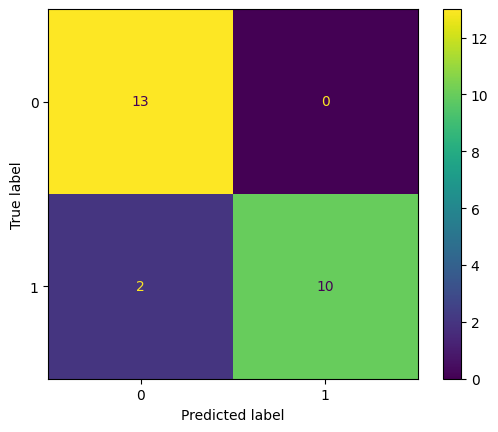

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_selected.classes_)
disp.plot()